## Setup and Data Dwonload

In this section, we will take the Gridded Monthly Temperature Anomaly Data from 1880-present from GISTEMP and visualize the temperature anomaly for the year 2021

The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [1]:
%%capture
if 'google.colab' in str(get_ipython()):
  !apt-get --qq remove python-shapely python3-shapely
  !pip install --no-binary shapely shapely --force
  !pip install --no-binary cartopy cartopy==0.19.0.post1

In [2]:
import cartopy
import cartopy.crs as ccrs
import os
import matplotlib.pyplot as plt
import xarray as xr

In [3]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [4]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

filename = 'gistemp1200_GHCNv4_ERSSTv5.nc'
data_url = 'https://github.com/spatialthoughts/python-dataviz-web/raw/main/data/gistemp/'

download(data_url + filename)

Downloaded data/gistemp1200_GHCNv4_ERSSTv5.nc


## Data Pre-Processing

We read the data using `XArray`, select the `tempanomaly` variable and aggregate it to yearly anoamalies.

In [5]:
file_path = os.path.join(data_folder, filename)
ds = xr.open_dataset(file_path)
da = ds.tempanomaly

In [6]:
yearly = da.groupby('time.year').mean(dim='time')
yearly

<xarray.DataArray 'tempanomaly' (year: 142, lat: 90, lon: 180)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 3.7966664 ,  3.7966664 ,  3.7966664 , ...,  3.7966664 ,
          3.7966664 ,  3.7966664 ],
        [ 3.7966664 ,  3.7966664 ,  3.7966664 , ...,  3.7966664 ,
          3.7966664 ,  3.7966664 ],
        [ 3.7966664 ,  3.7966664 ,  3.7966664 , ...,  3.7966664 ,
          3.7966664 ,  3.7966664 ]],

       [[-1.0675001 , -1.0675001 , -1.0675001 , ..., -1.0675001 ,
         -1.0675001 , -1.0675001 ],
        [-1.0675001 , -1.0675001 , -1.0675001 , ..., -1.0675001 ,
         -1.0675001 , -1.0675001 ],
        [-1.0675001 , -1.0675001 , -1.0675001 , ..., -1.0675001 ,
         -1.0675001 , -1.0675001 ],
        ...,
        [ 3.7291667 ,  3.7291667 ,  3.7291667 , ...,  3.7291667 ,
          3.7291667 ,  3.7291667 ],
        [ 3.7291667 ,  3.7291667 ,  3.7291667 , ...,  3.7291667 ,
          3.7291667 ,  3.7291667 ],
        [ 3.7291667 ,  3.7291667 ,  3.7291667 , ...,  3.7291667 ,
          3.7291667 ,  3.7291667 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * year     (year) int64 1880 1881 1882 1883 1884 ... 2017 2018 2019 2020 2021
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

## Plotting using Matplotlib

XArray provides a `plot()` method based on Matplotlib. When you call `plot()` on a 2D DataArray, it uses the `xarray.plot.pcolormesh()` function that creates a Pseudocolor plot.

In [7]:
anomaly2021 = yearly.sel(year=2021)
anomaly2021

<xarray.DataArray 'tempanomaly' (lat: 90, lon: 180)>
array([[-1.0675001, -1.0675001, -1.0675001, ..., -1.0675001, -1.0675001,
        -1.0675001],
       [-1.0675001, -1.0675001, -1.0675001, ..., -1.0675001, -1.0675001,
        -1.0675001],
       [-1.0675001, -1.0675001, -1.0675001, ..., -1.0675001, -1.0675001,
        -1.0675001],
       ...,
       [ 3.7291667,  3.7291667,  3.7291667, ...,  3.7291667,  3.7291667,
         3.7291667],
       [ 3.7291667,  3.7291667,  3.7291667, ...,  3.7291667,  3.7291667,
         3.7291667],
       [ 3.7291667,  3.7291667,  3.7291667, ...,  3.7291667,  3.7291667,
         3.7291667]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
    year     int64 2021
Attributes:
    long_name:     Surface temperature anomaly
    units:         K
    cell_methods:  time: mean

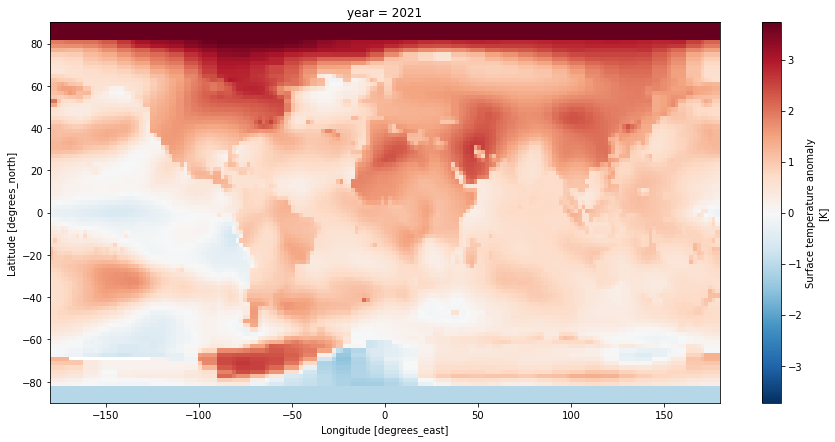

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
anomaly2021.plot(ax=ax)
plt.show()

While the `plot()` method works, it is slower than the `plot.imshow()` method when rendering large 2D-arrays. So we would prefer using it instead of the `plot()` method.

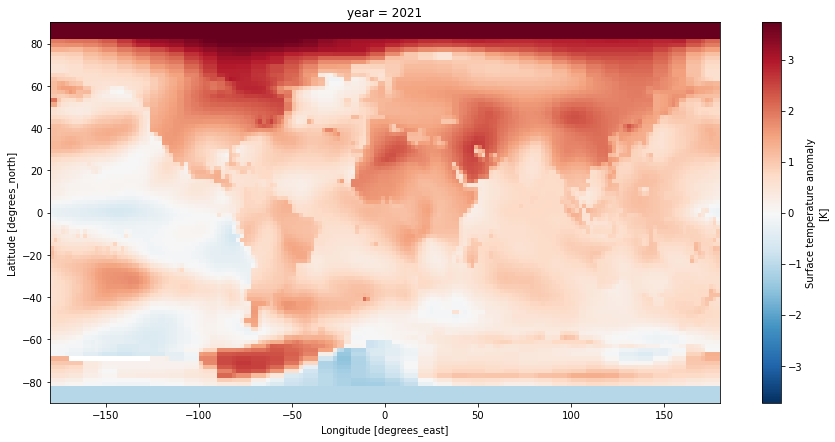

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)
anomaly2021.plot.imshow(ax=ax)
plt.show()

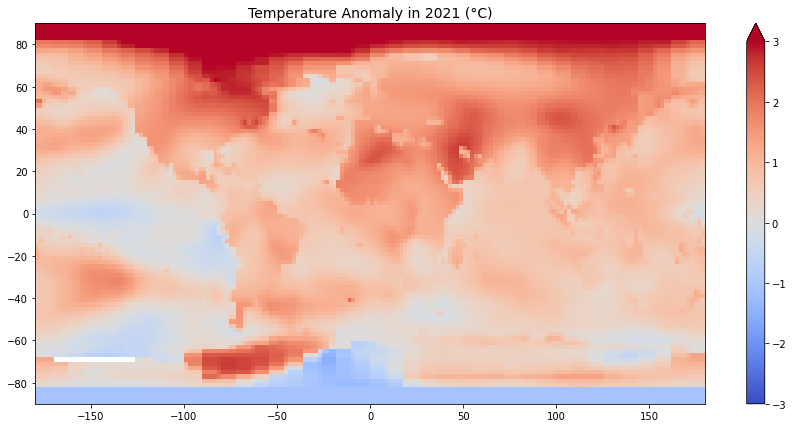

In [10]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)

anomaly2021.plot.imshow(ax=ax,
    vmin=-3, vmax=3, add_labels=False, cmap='coolwarm')

ax.set_title('Temperature Anomaly in 2021 (°C)', fontsize = 14)

plt.show()

## Plotting using Cartopy

To create more informative map visualization, we need to reproject this grid to another projection. CartoPy supports a wide range of projections and can plot them using matplotlib. CartoPy creates a GeoAxes object and replaces the default Axes with it. This allows you to plot the data on a specified projection.

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-pa

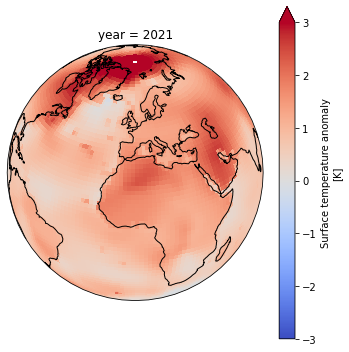

In [11]:
ax = plt.axes(projection=ccrs.Orthographic(0, 30))
ax.coastlines()
anomaly2021.plot.imshow(ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree())

fig = plt.gcf()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

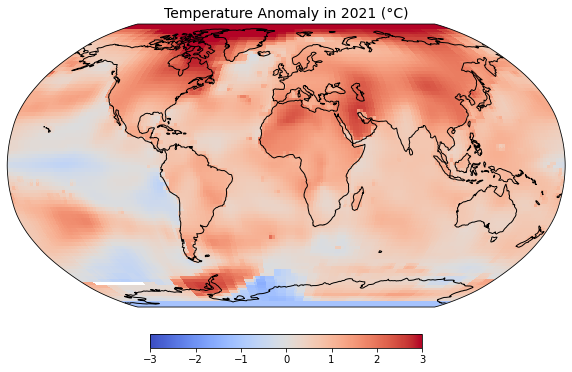

In [22]:
# Exercise
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
anomaly2021.plot.imshow(
    ax=ax,
    vmin=-3, vmax=3, cmap='coolwarm',
    transform=ccrs.PlateCarree(),
    add_labels=False,
    cbar_kwargs=cbar_kwargs)

fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Temperature Anomaly in 2021 (°C)', fontsize = 14)

output_folder = 'output'
output_path = os.path.join(output_folder, 'anomaly.jpg')
plt.savefig(output_path, dpi=300)
plt.show()